In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<AxesSubplot:ylabel='count'>

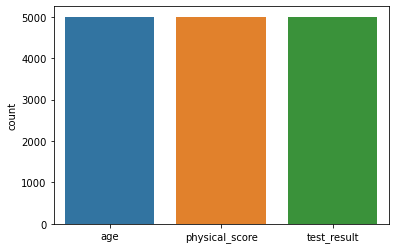

In [6]:
sns.countplot(data=df)

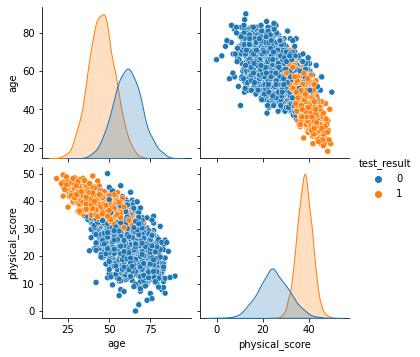

In [7]:
sns.pairplot(data=df, hue='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

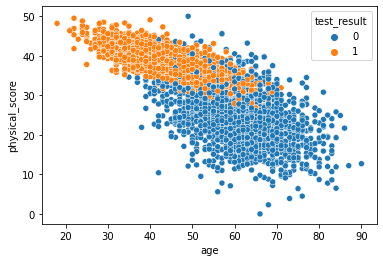

In [8]:
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

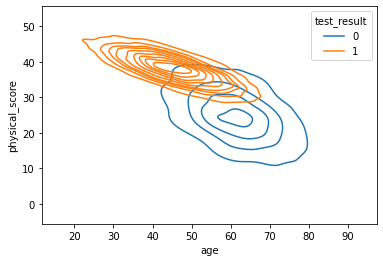

In [9]:
sns.kdeplot(data=df, x='age', y='physical_score', hue='test_result')

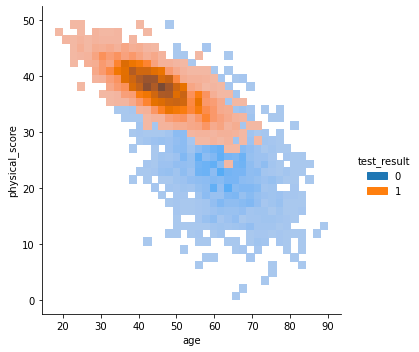

In [10]:
sns.displot(data=df, x='age', y='physical_score', hue='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

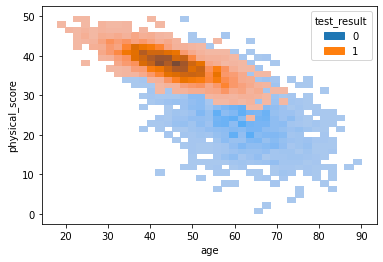

In [11]:
sns.histplot(data=df, x='age', y='physical_score', hue='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

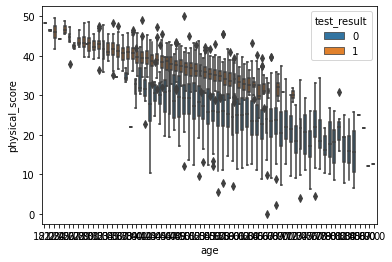

In [12]:
sns.boxplot(x='age',y='physical_score',data=df, hue='test_result')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

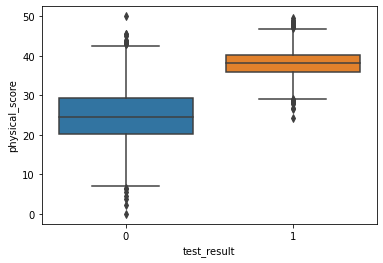

In [13]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:>

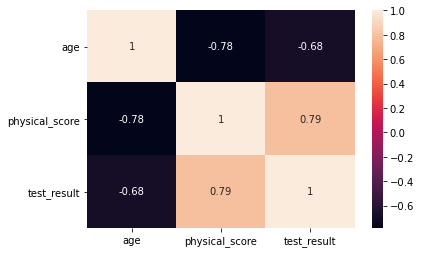

In [14]:
sns.heatmap(df.corr(),annot=True)

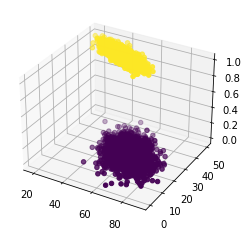

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [17]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)

In [23]:
scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(scaled_X_test)

In [28]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [30]:
accuracy_score(y_test, y_pred)

0.93

In [31]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



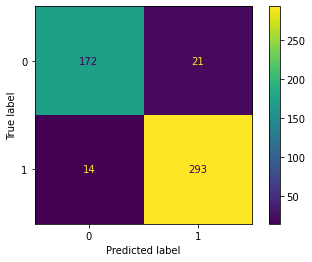

In [35]:
plot_confusion_matrix(model, scaled_X_test, y_test)

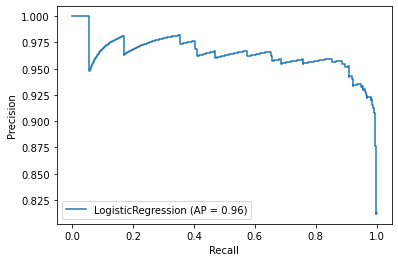

In [36]:
plot_precision_recall_curve(model, scaled_X_test, y_test)

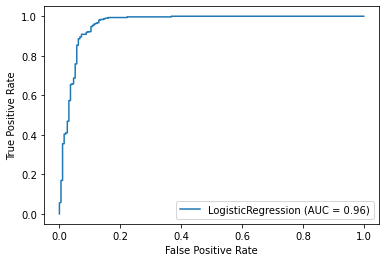

In [37]:
plot_roc_curve(model, scaled_X_test, y_test)